In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def map_image(image, label):
  '''Normalizes and flattens the image. Returns image as input and label.'''
  image = tf.cast(image, dtype=tf.float32)
  image = image / 255.0
  image = tf.reshape(image, shape=(784,))

  return image, image

In [3]:
# Load the train and test sets from TFDS

BATCH_SIZE = 128
SHUFFLE_BUFFER_SIZE = 1024

train_dataset = tfds.load('mnist', as_supervised=True, split="train")
train_dataset = train_dataset.map(map_image)
train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).repeat()

test_dataset = tfds.load('mnist', as_supervised=True, split="test")
test_dataset = test_dataset.map(map_image)
test_dataset = test_dataset.batch(BATCH_SIZE).repeat()

In [4]:
#Bulid the Model
#Deep autoencoder
def deep_auto(inputs):
    encoder = tf.keras.layers.Dense(units=128, activation='relu') (inputs)
    encoder = tf.keras.layers.Dense(units=64, activation='relu') (encoder)
    encoder = tf.keras.layers.Dense(units=32, activation='relu') (encoder)

    decoder = tf.keras.layers.Dense(units=64, activation='relu' )(encoder)
    decoder = tf.keras. layers.Dense(units=128, activation='relu') (decoder)
    decoder = tf.keras.layers.Dense(units=784, activation='sigmoid' ) (decoder)
    return encoder, decoder
# set the input shape
inputs=tf.keras.layers.Input(shape=(784,))

# get the encoder and decoder output
encoderoutput,decoderoutput=deep_auto(inputs)

# setup the encoder Model because you will visualize its output later
encoder=tf.keras.Model(inputs=inputs,outputs=encoderoutput)

# setup the autoencoder Model
autoencoder=tf.keras.Model(inputs=inputs,outputs=decoderoutput)


In [5]:
# Compile the model using Adam Optimizer , binary_crossentropy and  metrics=['accuracy']
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(),loss="binary_crossentropy")


In [6]:
# train the model using train_dataset,steps_per_epoch=step,epochs=10
step=60000//BATCH_SIZE
his=autoencoder.fit(train_dataset,steps_per_epoch=step,epochs=10)


Epoch 1/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.2892
Epoch 2/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.1410
Epoch 3/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.1215
Epoch 4/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.1132
Epoch 5/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.1087
Epoch 6/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.1052
Epoch 7/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.1020
Epoch 8/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0992
Epoch 9/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0971
Epoch 10/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0956


Text(0, 0.5, 'Loss')

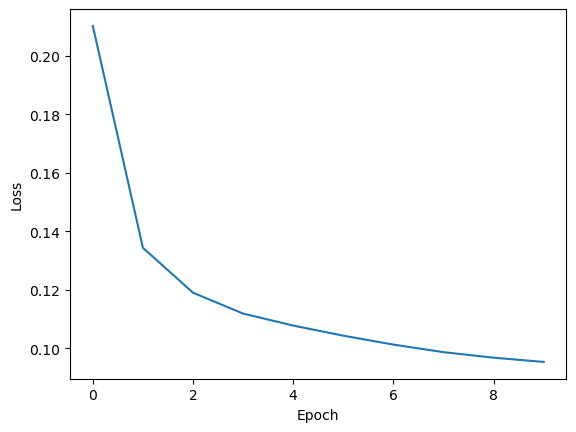

In [7]:
# his variable stores the outputs of the model comiplation 
plt.plot(his.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [8]:
def display_one_row(disp_images, offset, shape=(28, 28)):
  '''Display sample outputs in one row.'''
  for idx, test_image in enumerate(disp_images):
    plt.subplot(3, 10, offset + idx + 1)
    plt.xticks([])
    plt.yticks([])
    test_image = np.reshape(test_image, shape)
    plt.imshow(test_image, cmap='gray')


def display_results(disp_input_images, disp_encoded, disp_predicted, enc_shape=(8,4)):
  '''Displays the input, encoded, and decoded output values.'''
  plt.figure(figsize=(15, 5))
  display_one_row(disp_input_images, 0, shape=(28,28,))
  display_one_row(disp_encoded, 10, shape=enc_shape)
  display_one_row(disp_predicted, 20, shape=(28,28,))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


2024-10-21 22:27:26.581512: W tensorflow/core/kernels/data/cache_dataset_ops.cc:913] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-10-21 22:27:26.583092: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-10-21 22:27:26.619927: W tensorflow/core/kernels/data/cache_dataset_ops.cc:913] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


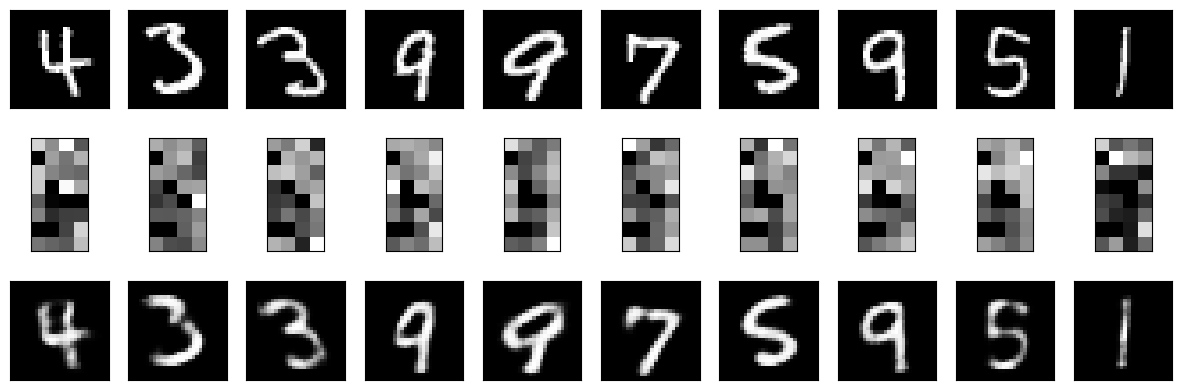

In [9]:
# take 1 batch of the dataset
test_dataset = test_dataset.take(1)

# take the input images and put them in a list
output_samples = []
for input_image, image in tfds.as_numpy(test_dataset):
      output_samples = input_image

# pick 10 random numbers to be used as indices to the list above
idxs = np.random.choice(BATCH_SIZE, size=10)

# get the encoder output
encoded_predicted = encoder.predict(test_dataset)

# get a prediction for the test batch
simple_predicted = autoencoder.predict(test_dataset)

# display the 10 samples, encodings and decoded values!
display_results(output_samples[idxs], encoded_predicted[idxs], simple_predicted[idxs])